In [8]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
file_path = 'C:/Users/Dell/Documents/Data Preparation Project/dataset/'

# Function

In [19]:
def firstsight(df:pd.DataFrame, name:str):
    print('-'*100)
    print(f'\033[1m{name}\033[0m')
    print('-'*100)
    print(f'Shape:{df.shape}')
    print('First 5 rows:')
    display(df.head(5))
    print("Features' datatype and null count:")
    col_info = pd.DataFrame()
    col_info.index = df.columns
    col_info['Datatype'] = df.dtypes
    col_info['Number of Missing Values'] = df.isnull().sum()
    col_info['Percent of Missing Values'] = col_info['Number of Missing Values'] / df.shape[0] * 100
    display(col_info)
    print("Features's descriptive statistics:")
    display(df.describe().T)
    print('-'*100)
    print("Data type value counts: \n",df.dtypes.value_counts())
    print('Number of categorical columns:', df.dtypes.eq("object").sum())
    print('Number of numeric columns: ', df.shape[1] - df.dtypes.eq("object").sum())
    print('-'*100)
    print("\nReturn number of unique elements in the object. \n")
    print(df.select_dtypes('object').apply(pd.Series.nunique, axis = 0))

In [12]:
# Function to create a dataframe of percentage of NaN values for each column of the dataframe
def nan_df_create(data):   
    nan_percentages = data.isna().sum() * 100 / len(data)
    df = pd.DataFrame({'column' : nan_percentages.index, 'percent' : nan_percentages.values})
    
    #sorting the dataframe by decreasing order of percentage of NaN values
    df.sort_values(by = 'percent', ascending = False, inplace = True)
    
    return df

In [11]:
# Function to plot Bar Plots of NaN percentages for each Column with missing values
def plot_nan_percent(df_nan, title_name, tight_layout = True, figsize = (20,8), grid = False, rotation = 90):
     #checking if there is any column with NaNs or not.
    if df_nan.percent.sum() != 0:
        print(f"Number of columns having NaN values: {df_nan[df_nan['percent'] != 0].shape[0]} columns")
        
        #plotting the Bar-Plot for NaN percentages (only for columns with Non-Zero percentage of NaN values)
        plt.figure(figsize = figsize, tight_layout = tight_layout)
        sns.barplot(x= 'column', y = 'percent', data = df_nan[df_nan['percent'] > 0])
        plt.xticks(rotation = rotation)
        plt.xlabel('Column Name')
        plt.ylabel('Percentage of NaN values')
        plt.title(f'Percentage of NaN values in {title_name}')
        if grid:
            plt.grid()
        plt.show()
    else:
        print(f"The dataframe {title_name} does not contain any NaN values.")

In [41]:
def correlation_with_target_top_n(df,n):
    df_corr= df.corr()['TARGET'].sort_values()
    print(n,'Positive Correlations:\n', df_corr.tail(n))
    print('\n',n,' Negative Correlations:\n', df_corr.head(n))
    

In [45]:
def plot_continuous_variables(data, column_name, plots = ['distplot', 'CDF', 'box', 'violin'], scale_limits = None, figsize = (20,8), histogram = True, log_scale = False):


    data_to_plot = data.copy()
    if scale_limits:
        #taking only the data within the specified limits
        data_to_plot[column_name] = data[column_name][(data[column_name] > scale_limits[0]) & (data[column_name] < scale_limits[1])]

    number_of_subplots = len(plots)
    plt.figure(figsize = figsize)
    sns.set_style('whitegrid')
    
    for i, ele in enumerate(plots):
        plt.subplot(1, number_of_subplots, i + 1)
        plt.subplots_adjust(wspace=0.25)
        
        if ele == 'CDF':
            #making the percentile DataFrame for both positive and negative Class Labels
            percentile_values_0 = data_to_plot[data_to_plot.TARGET == 0][[column_name]].dropna().sort_values(by = column_name)
            percentile_values_0['Percentile'] = [ele / (len(percentile_values_0)-1) for ele in range(len(percentile_values_0))]
            
            percentile_values_1 = data_to_plot[data_to_plot.TARGET == 1][[column_name]].dropna().sort_values(by = column_name)
            percentile_values_1['Percentile'] = [ele / (len(percentile_values_1)-1) for ele in range(len(percentile_values_1))]
            
            plt.plot(percentile_values_0[column_name], percentile_values_0['Percentile'], color = 'red', label = 'Non-Defaulters')
            plt.plot(percentile_values_1[column_name], percentile_values_1['Percentile'], color = 'black', label = 'Defaulters')
            plt.xlabel(column_name)
            plt.ylabel('Probability')
            plt.title('CDF of {}'.format(column_name))
            plt.legend(fontsize = 'medium')
            if log_scale:
                plt.xscale('log')
                plt.xlabel(column_name + ' - (log-scale)')
            
        if ele == 'distplot':  
            sns.distplot(data_to_plot[column_name][data['TARGET'] == 0].dropna(),
                         label='Non-Defaulters', hist = False, color='red')
            sns.distplot(data_to_plot[column_name][data['TARGET'] == 1].dropna(),
                         label='Defaulters', hist = False, color='black')
            plt.xlabel(column_name)
            plt.ylabel('Probability Density')
            plt.legend(fontsize='medium')
            plt.title("Dist-Plot of {}".format(column_name))
            if log_scale:
                plt.xscale('log')
                plt.xlabel(f'{column_name} (log scale)')

        if ele == 'violin':  
            sns.violinplot(x='TARGET', y=column_name, data=data_to_plot)
            plt.title("Violin-Plot of {}".format(column_name))
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (log Scale)')

        if ele == 'box':  
            sns.boxplot(x='TARGET', y=column_name, data=data_to_plot)
            plt.title("Box-Plot of {}".format(column_name))
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (log Scale)')

    plt.show()

# Read data

In [32]:
bureau = pd.read_csv(file_path + "dseb63_bureau.csv")
bureau_balance = pd.read_csv(file_path + "dseb63_bureau_balance.csv")

In [22]:
app_train = pd.read_csv(file_path + "dseb63_application_train.csv", index_col='Unnamed: 0')

# SUMARRY OF BUREAU AND BUREAU BALANCE DATAFRAME

1. BUREAU

In [20]:
firstsight(bureau, 'bureau')

----------------------------------------------------------------------------------------------------
bureau
----------------------------------------------------------------------------------------------------
Shape:(1465325, 17)
First 5 rows:


,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
0,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,254629
1,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,254629
2,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,254629
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,254629
4,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,254629


Features' datatype and null count:


,Datatype,Number of Missing Values,Percent of Missing Values
SK_ID_BUREAU,int64,0,0.000000
CREDIT_ACTIVE,object,0,0.000000
CREDIT_CURRENCY,object,0,0.000000
DAYS_CREDIT,int64,0,0.000000
CREDIT_DAY_OVERDUE,int64,0,0.000000
DAYS_CREDIT_ENDDATE,float64,89098,6.080426
DAYS_ENDDATE_FACT,float64,544673,37.170798
AMT_CREDIT_MAX_OVERDUE,float64,948545,64.732738
CNT_CREDIT_PROLONG,int64,0,0.000000
AMT_CREDIT_SUM,float64,3,0.000205


Features's descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
SK_ID_BUREAU,1465325.0,5.890328e+06,5.378271e+05,5000000.000,5416944.0,5.856021e+06,6363543.0,6.843457e+06
DAYS_CREDIT,1465325.0,-1.143600e+03,8.000200e+02,-2922.000,-1671.0,-9.850000e+02,-470.0,0.000000e+00
CREDIT_DAY_OVERDUE,1465325.0,8.887612e-01,3.824707e+01,0.000,0.0,0.000000e+00,0.0,2.792000e+03
DAYS_CREDIT_ENDDATE,1376227.0,4.931322e+02,4.964905e+03,-42060.000,-1144.0,-3.340000e+02,473.0,3.119900e+04
DAYS_ENDDATE_FACT,920652.0,-1.022765e+03,7.183717e+02,-42023.000,-1503.0,-9.000000e+02,-427.0,0.000000e+00
AMT_CREDIT_MAX_OVERDUE,516780.0,3.942852e+03,2.196856e+05,0.000,0.0,0.000000e+00,0.0,1.159872e+08
CNT_CREDIT_PROLONG,1465325.0,7.278249e-03,1.026408e-01,0.000,0.0,0.000000e+00,0.0,9.000000e+00
AMT_CREDIT_SUM,1465322.0,3.516889e+05,1.078009e+06,0.000,51165.0,1.246981e+05,308250.0,3.960000e+08
AMT_CREDIT_SUM_DEBT,1242231.0,1.358890e+05,6.756650e+05,-4705600.320,0.0,0.000000e+00,39654.0,1.701000e+08
AMT_CREDIT_SUM_LIMIT,975655.0,6.363687e+03,4.543915e+04,-586406.115,0.0,0.000000e+00,0.0,4.705600e+06


----------------------------------------------------------------------------------------------------
Data type value counts: 
 float64    8
int64      6
object     3
Name: count, dtype: int64
Number of categorical columns: 3
Number of numeric columns:  14
----------------------------------------------------------------------------------------------------

Return number of unique elements in the object. 

CREDIT_ACTIVE       4
CREDIT_CURRENCY     4
CREDIT_TYPE        15
dtype: int64


NaN Columns and Percentage

----------------------------------------------------------------------------------------------------
Number of columns having NaN values: 7 columns


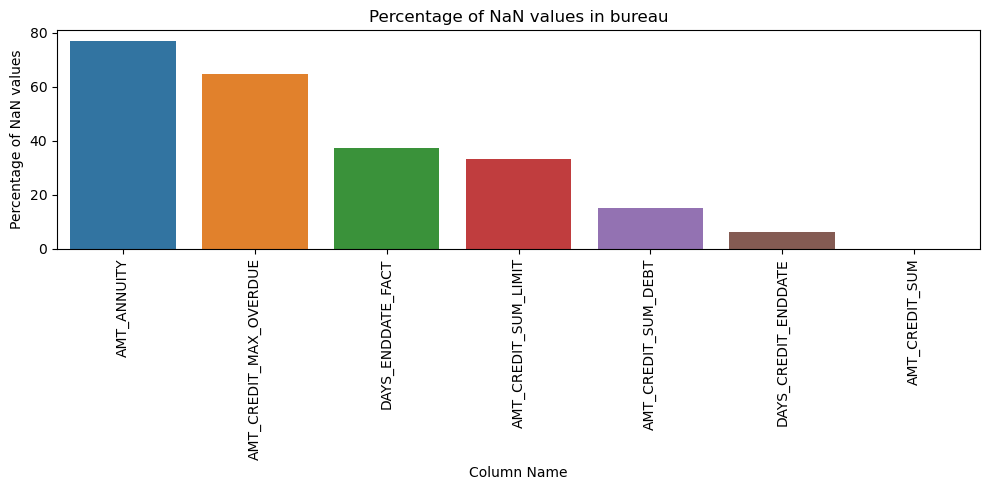

----------------------------------------------------------------------------------------------------


In [14]:
nan_df_bureau = nan_df_create(bureau)
print("-"*100)
plot_nan_percent(nan_df_bureau, 'bureau', tight_layout = False, figsize = (10,5))
print('-'*100)

- There are 7/17 features contain NaN values
- The highest NaN values are observed with the column AMT_ANNUITY which has over 70% missing values.

Merging the TARGETS from application_train to bureau table.

2. BUREAU BALANCE

In [21]:
firstsight(bureau_balance, 'Bureau Balance')

----------------------------------------------------------------------------------------------------
Bureau Balance
----------------------------------------------------------------------------------------------------
Shape:(27299925, 3)
First 5 rows:


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


Features' datatype and null count:


,Datatype,Number of Missing Values,Percent of Missing Values
SK_ID_BUREAU,int64,0,0.0
MONTHS_BALANCE,int64,0,0.0
STATUS,object,0,0.0


Features's descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
SK_ID_BUREAU,27299925.0,6.036297e+06,492348.856904,5001709.0,5730933.0,6070821.0,6431951.0,6842888.0
MONTHS_BALANCE,27299925.0,-3.074169e+01,23.864509,-96.0,-46.0,-25.0,-11.0,0.0


----------------------------------------------------------------------------------------------------
Data type value counts: 
 int64     2
object    1
Name: count, dtype: int64
Number of categorical columns: 1
Number of numeric columns:  2
----------------------------------------------------------------------------------------------------

Return number of unique elements in the object. 

STATUS    8
dtype: int64


# ANALYSIS BUREAU DATA

1. Combine with app train

In [33]:
bureau_merged = app_train.merge(bureau, on = 'SK_ID_CURR', how = 'left')

In [35]:
firstsight(bureau_merged, 'Bureau-Target')

----------------------------------------------------------------------------------------------------
Bureau-Target
----------------------------------------------------------------------------------------------------
Shape:(1208578, 138)
First 5 rows:


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,...,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y
0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,-2131.0,0.0,0.0,22248.0,0.0,0.0,0.0,Consumer credit,-2131.0,NaN
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,-540.0,0.0,0.0,112500.0,0.0,0.0,0.0,Credit card,-540.0,NaN
2,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,-621.0,0.0,0.0,72652.5,0.0,0.0,0.0,Consumer credit,-550.0,NaN
3,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,0.0,0.0,810000.0,0.0,810000.0,0.0,Credit card,-43.0,NaN
4,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Features' datatype and null count:


,Datatype,Number of Missing Values,Percent of Missing Values
TARGET,int64,0,0.000000
NAME_CONTRACT_TYPE,object,0,0.000000
CODE_GENDER,object,0,0.000000
FLAG_OWN_CAR,object,0,0.000000
FLAG_OWN_REALTY,object,0,0.000000
...,...,...,...
AMT_CREDIT_SUM_LIMIT,float64,427483,35.370741
AMT_CREDIT_SUM_OVERDUE,float64,35200,2.912514
CREDIT_TYPE,object,35200,2.912514
DAYS_CREDIT_UPDATE,float64,35200,2.912514


Features's descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
TARGET,1208578.0,0.078864,0.269526,0.000,0.0,0.00,0.00,1.000000e+00
CNT_CHILDREN,1208578.0,0.422971,0.722242,0.000,0.0,0.00,1.00,1.900000e+01
AMT_INCOME_TOTAL,1208578.0,179622.318661,112168.149450,25650.000,112500.0,157500.00,225000.00,1.350000e+07
AMT_CREDIT,1208578.0,622038.447928,409204.913252,45000.000,284400.0,536917.50,835605.00,4.050000e+06
AMT_ANNUITY_x,1208539.0,27446.194999,14283.345373,1615.500,16875.0,25321.50,35284.50,2.580255e+05
...,...,...,...,...,...,...,...,...
AMT_CREDIT_SUM_DEBT,994765.0,135835.040523,685467.247028,-4705600.320,0.0,0.00,39411.00,1.701000e+08
AMT_CREDIT_SUM_LIMIT,781095.0,6346.048587,45860.360407,-586406.115,0.0,0.00,0.00,4.705600e+06
AMT_CREDIT_SUM_OVERDUE,1173378.0,44.209116,6887.893812,0.000,0.0,0.00,0.00,3.756681e+06
DAYS_CREDIT_UPDATE,1173378.0,-599.314645,731.714421,-41947.000,-903.0,-406.00,-33.00,3.720000e+02


----------------------------------------------------------------------------------------------------
Data type value counts: 
 float64    78
int64      41
object     19
Name: count, dtype: int64
Number of categorical columns: 19
Number of numeric columns:  119
----------------------------------------------------------------------------------------------------

Return number of unique elements in the object. 

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
CREDIT_ACTIVE                  4
CREDIT_CURRENCY           

# TOP Correlation numeric with 'TARGET'

In [39]:
num_cols = [col for col in bureau_merged.columns if bureau_merged[col].dtypes != 'object']
numeric_bureaudata = bureau_merged[num_cols]

In [40]:
df_corr=correlation_with_target_top_n(numeric_bureaudata[numeric_bureaudata['TARGET'].notnull()],10)
df_corr

10 Positive Correlations:
 FLAG_DOCUMENT_3                0.040242
REG_CITY_NOT_WORK_CITY         0.040467
DAYS_CREDIT_UPDATE             0.041306
DAYS_ID_PUBLISH                0.043433
DAYS_LAST_PHONE_CHANGE         0.043646
REGION_RATING_CLIENT           0.048668
REGION_RATING_CLIENT_W_CITY    0.051162
DAYS_CREDIT                    0.061297
DAYS_BIRTH                     0.067486
TARGET                         1.000000
Name: TARGET, dtype: float64

 10  Negative Correlations:
 EXT_SOURCE_3                 -0.184698
EXT_SOURCE_1                 -0.152445
EXT_SOURCE_2                 -0.145525
FLOORSMAX_AVG                -0.037207
FLOORSMAX_MEDI               -0.036850
FLOORSMAX_MODE               -0.036656
DAYS_EMPLOYED                -0.033611
AMT_GOODS_PRICE              -0.032709
REGION_POPULATION_RELATIVE   -0.027760
ELEVATORS_AVG                -0.027511
Name: TARGET, dtype: float64


EXT_SOURCE_3                  -0.184698
EXT_SOURCE_1                  -0.152445
EXT_SOURCE_2                  -0.145525
FLOORSMAX_AVG                 -0.037207
FLOORSMAX_MEDI                -0.036850
                                 ...   
REGION_RATING_CLIENT           0.048668
REGION_RATING_CLIENT_W_CITY    0.051162
DAYS_CREDIT                    0.061297
DAYS_BIRTH                     0.067486
TARGET                         1.000000
Name: TARGET, Length: 119, dtype: float64

# Ploting numerical variables

1. DAY_CREDIT

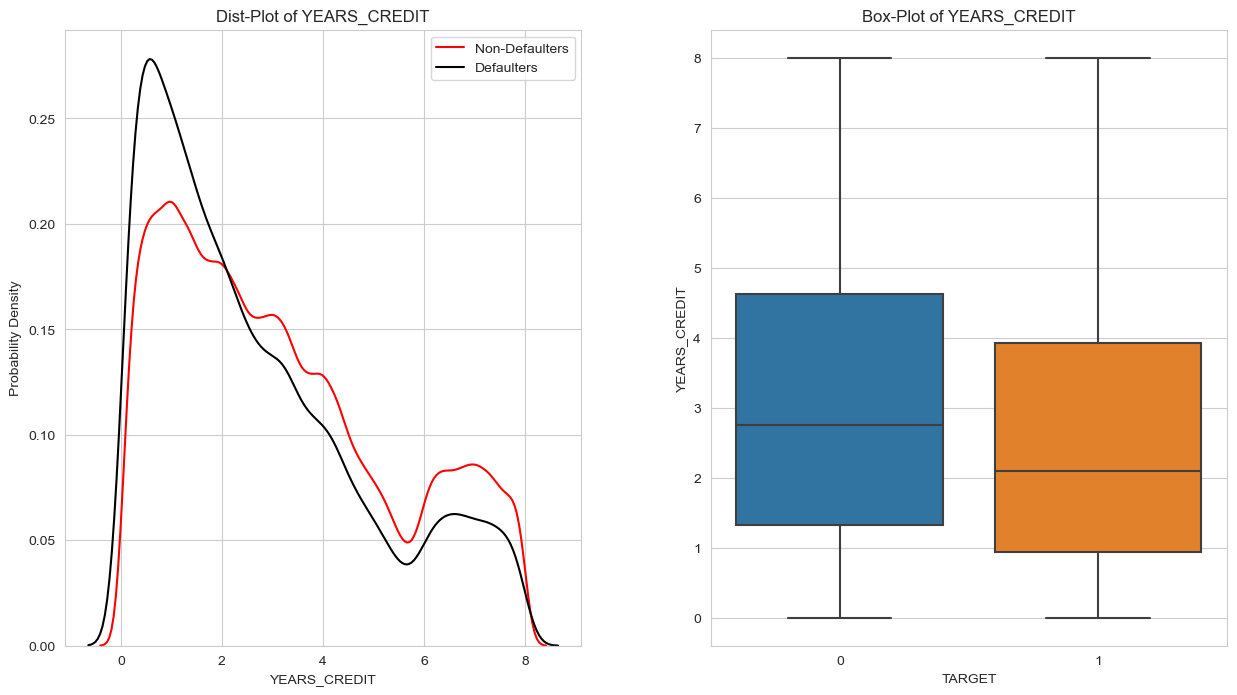

In [48]:
bureau_merged['YEARS_CREDIT'] = bureau_merged['DAYS_CREDIT'] / -365
plot_continuous_variables(bureau_merged, 'YEARS_CREDIT', plots = ['distplot', 'box'], figsize = (15,8))
_ = bureau_merged.pop('YEARS_CREDIT')

# Plotting Categorical Variables
Plot some of the Categorical Variables of table previous_application and see how they impact the Target Variable.